In [3]:
number1 = 69
number2 = 420
#hashtag means comment
number3 = int(input('Enter an integer '))

#largest number 
max = number1
if number2 > max:
    max = number2 #indentation(tabs) in python plays the role of brackets 
if number3 > max:
    max = number3

print('Maximum number among three is ', max)

Enter an integer  6969


Maximum number among three is  6969


Example 2 Lists in Python

In [5]:
#define a list and sort it
num1 = [17, 23, 10, 20] 
num1.sort()
print('Sorted List: ')
print(num1)

#defining empty list and read 4 numbers then sort
num2 = []
for i in range(0,4):
    num2.append(int(input("Enter number : ")))
num2.sort()
print('Sorted List : ')
print(num2)

Sorted List: 
[10, 17, 20, 23]


Enter number :  10
Enter number :  222
Enter number :  7
Enter number :  2


Sorted List : 
[2, 7, 10, 222]


Example 3 Introducing arrays and NumPy

In [16]:
#NumPy is Numerical Python which is Python's standard library
import numpy as np

#declaring numpy array of 5 elements
x = np.array([1, 23,12,-4,8])
y = np.array([34,21,200,83,0])

#add two arrays element by element using a for-loop
s = np.empty(shape=(5)) #an array of size 5

#for loop
for i in range(0,5):
    s[i] = x[i] + y[i]
print(s)

#but as far as possible try not to use loops with numpy arrays. Several built in fuctions does it way better and faster
p = np.empty(shape = (5)) 
p = np.add(x,y)
print(p)

#we can declare a 2D arrays as this
A = np.array([[34, 43, 45], [9, 3, 1], [12, 47, 8]]) #3by3 array
B = np.array([[-1, -4, 56], [213, 2, 6], [19, 10, 1]])
C = np.empty(shape = (3, 3))
C = np.add(A,B)
print(C)

[ 35.  44. 212.  79.   8.]
[ 35  44 212  79   8]
[[ 33  39 101]
 [222   5   7]
 [ 31  57   9]]


3 OpenCV Examples

Example 1 Convolution using OpenCV spatial filter function

In [ ]:
import cv2 as cv
import numpy as np

# Read the image as grayscale
# second argument 0 ==> read as grayscale
# second argument 1 ==> read as color( thisisdefault )

img = cv.imread(r'E:\AAA BE Computer\7th sem\jhyal.jpg')
cv.imshow('Original Image', img)


#create box kernel with 1 ' s ==> for averaging
kernel = np.ones((5,5), np.float32)/25

#apply the 2D convolution operator
#result = cv.filter2D(img, -1, kernel)

#we could use negative values after the convolution, we we need to change the output matrix's type to, 
#for example, 32-bit oating point type. This could be achieved by
result = cv.filter2D(img,cv.CV_32F,kernel)

cv.imshow('After convolution', result)
cv.waitKey()

#save the result
cv.imwrite(r'E:\AAA BE Computer\7th sem\jhyal_after_conv.jpg ', result)

Example 2 Sobel Gradient using OpenCV's convolution function

In [4]:
import cv2 as cv
import numpy as np

img = cv.imread(r'E:\AAA BE Computer\7th sem\jhyal.jpg')

#sobel gradient for x direction since we are using convolution we need to rotate the matrix
kx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
gx = cv.filter2D(img, cv.CV_32F, kx)

ky = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
gy = cv.filter2D(img, cv.CV_32F, ky)

#calculate the magnitude
M = np.add(np.abs(gx), np.abs(gy))

#scale the magnitude to [0, 255] range
mn = np.min(M)
mx = np.max(M)
M = 255*(M-mn)/(mx-mn)

#display the gradient image
cv.imshow('Image Gradient' , M.astype(np.uint8))
cv.waitKey()

#saving the result
cv.imwrite(r'E:\AAA BE Computer\7th sem\jhyal_after_sobelOpenCV.jpg ', M)

True

1. Suppose you are developing a system to recognize people from scenic images. For this, you first need
to find and bound the location of human faces in the image. How would you solve this problem using
the technique of template matching with the help of OpenCV library? To simplify the problem, you
can assume that there is a single person in the image with face turned towards the camera.

In [18]:
import cv2 as cv
img = cv.imread(r'E:\AAA BE Computer\7th sem\IPPR\lab 4\image_face_two.jpg')
img.shape

(780, 1395, 3)

Notice that this is a 3-dimensional array. The array’s values represent the picture’s height, width, and channels respectively. Since this is a color image, there are three channels used to depict it - blue, green, and red (BGR). 

Note that while the conventional sequence used to represent images is RGB (Red, Blue, Green), the OpenCV library uses the opposite layout (Blue, Green, Red).

In [19]:
#To improve computational efficiency, we first need to convert this image to grayscale before performing face detection on it:
#GRAYSCALING
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_image.shape

(780, 1395)

Notice that this array only has two values since the image is grayscale and no longer has the third color channel.

In [20]:
#Load the classifier
#load the pre-trained Haar Cascade classifier that is built into OpenCV:
face_classifier = cv.CascadeClassifier(
    cv.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Notice that we are using a file called haarcascade_frontalface_default.xml. This classifier is designed specifically for detecting frontal faces in visual input. 

OpenCV also provides other pre-trained models to detect different objects within an image - such as a person’s eyes, smile, upper body, and even a vehicle’s license plate. You can learn more about the different classifiers built into OpenCV by examining the library’s GitHub repository.

In [21]:
#Perform Face detection
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [22]:
#draw a bounding box
for (x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

The face variable is an array with four values: the x and y axis in which the faces were detected, and their width and height. The above code iterates over the identified faces and creates a bounding box that spans across these measurements.

The parameter 0,255,0 represents the color of the bounding box, which is green, and 4 indicates its thickness.

(-0.5, 1394.5, 779.5, -0.5)

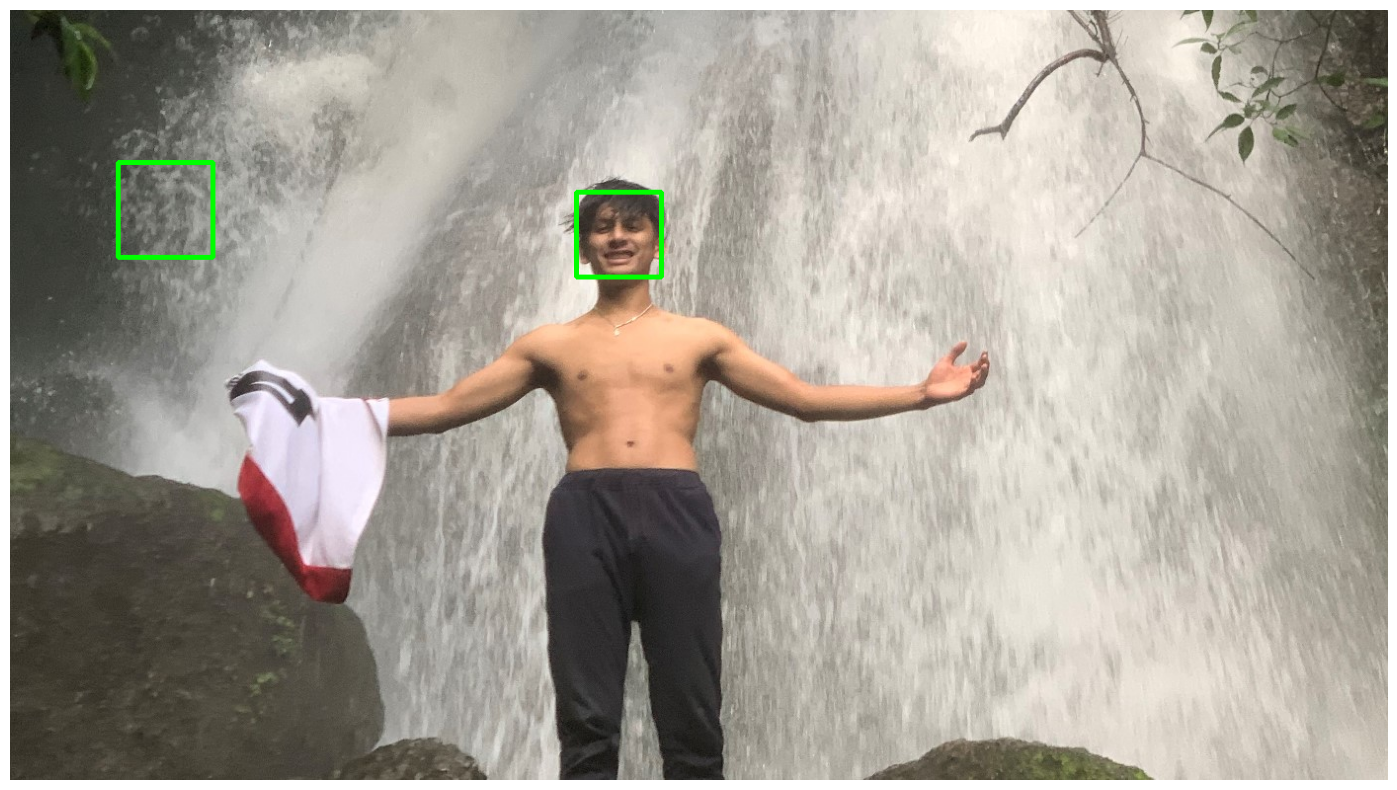

In [23]:
#display the image
#To display the image with the detected faces, we first need to convert the image from the BGR format to RGB:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

2. You are given an image le `messi_sin_noisy.jpg' which is corrupted by sinusoidal noise. Remove the
sinusoidal noise using Fourier analysis available on OpenCV library.